In [1]:
import json
import os
import pandas as pd
%matplotlib inline

In [2]:
with open('../data/motion/20181026_0000.json', mode='r', encoding='utf-8') as file:
    movement_data = [{'timestamp': row['timestamp'],
                      'origin': row['event']['variable'][row['event']['variable'].find('-') + 1:row['event']['variable'].find('.')],
                      'measurement': row['event']['variable'][row['event']['variable'].find('.') + 1:],
                      'metadata_timestamp': row['event']['metadata']['timestamp'],
                      'reading': row['event']['content'][:-1]} for row in json.loads(file.read())['data']]

In [3]:
salt_acceleration = [row for row in movement_data if row['origin'] == 'SALT' and row['measurement'] == 'acceleration']

In [4]:
df = pd.DataFrame({'x':[row['reading'][0] for row in salt_acceleration],
                   'y':[row['reading'][1] for row in salt_acceleration],
                   'z':[row['reading'][2] for row in salt_acceleration]},
                  index=pd.to_datetime([row['timestamp'] for row in salt_acceleration], unit='ms'))

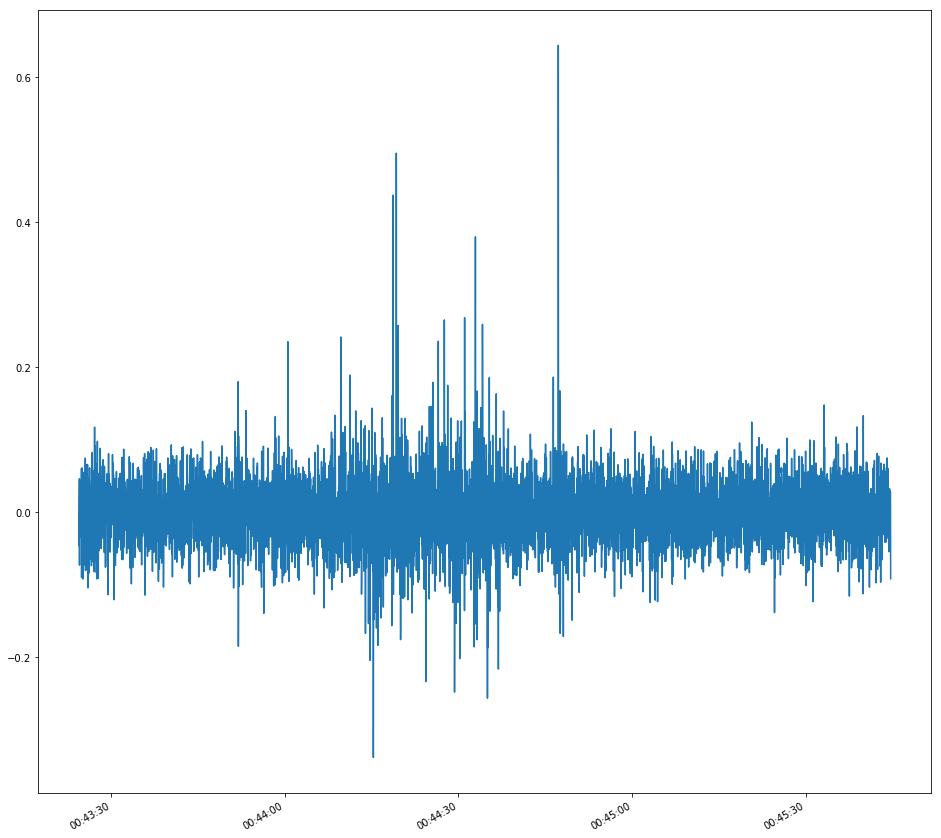

In [5]:
df[130000:137000]['z'].plot(figsize=(16, 16))

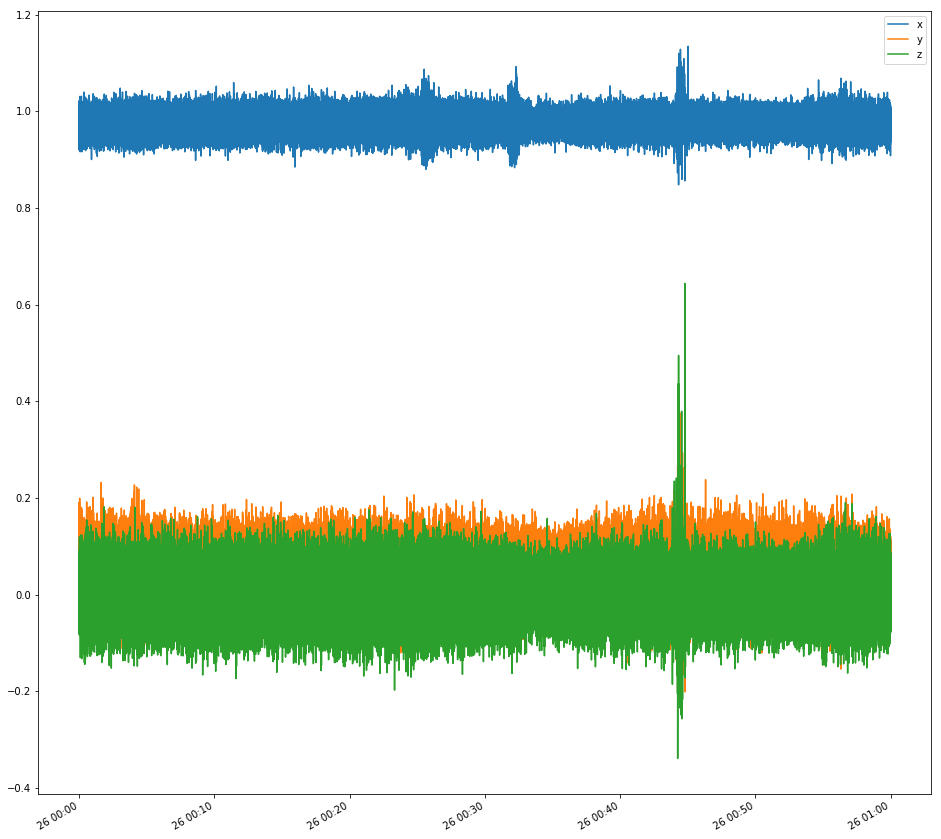

In [6]:
df.plot(figsize=(16, 16))